<div class="alert alert-info">
    <h2 align="center"> PC-FCGR: Accurate and fast machine learning-based classification by means of Physico-chemical FCGR encoding</h2>
    <h3 align="center"><a href="http://sharif.edu/~koohi/">Saeedeh Akbari Rokn Abadi</a>, <a href="http://sharif.edu/~koohi/">Amirhossein Mohammadi</a>, <a href="http://sharif.edu/~koohi/">Somayyeh Koohi</a></h3>
</div>

## Import Library and Modules


In [1]:
import time
import os, os.path
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd 
import sys
import re
import random
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score,balanced_accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Define Encoding Method

In [2]:
def Change_DNA(dna):
    dna = dna.replace("\n" , "")
    dna = dna.upper()
    dna = ''.join(i for i in dna if i =="A" or i == "C" or i == "G" or i == "T")
    return dna[10:]

def PC_FCGR(dna):    
    vector = 1024 #Determining the length of three vectors {weak or strong}, {amino or keto} and {purine or pyrimidine} based on k-mer size==>2^k
    start = vector // 2
    x = start

    weakStrong = [0] * (vector) #CG , AT
    aminoKeto = [0] * (vector) #AC , GT
    PurPyr = [0] * (vector) #AG , CT

    #weak or strong
    for i in range(len(dna)):
        if dna[i] == "C" or dna[i] == "G":
            x = (x + vector) // 2
            weakStrong[x] = weakStrong[x] + 1 
        
        elif dna[i] == "A" or dna[i] == "T":
            x = (x + 0) // 2
            weakStrong[x] = weakStrong[x] + 1

    x = start
    #amino or keto       
    for i in range(len(dna)):
        if dna[i] == "C" or dna[i] == "A":
            x = (x + vector) // 2
            aminoKeto[x] = aminoKeto[x] + 1 
        
        elif dna[i] == "G" or dna[i] == "T":
            x = (x + 0) // 2
            aminoKeto[x] = aminoKeto[x] + 1

    x = start
    #purine or pyrimidine
    for i in range(len(dna)):
        if dna[i] == "C" or dna[i] == "T":
            x = (x + vector) // 2
            PurPyr[x] = PurPyr[x] + 1 
        
        elif dna[i] == "A" or dna[i] == "G":
            x = (x + 0) // 2
            PurPyr[x] = PurPyr[x] + 1

    arr = np.concatenate((PurPyr, aminoKeto, weakStrong))
    return arr

## Reading Data From the Specified Path and Encode Them Based on PC-FCGR Coding

In [3]:
folders = []
dna = []
mypath = 'C://Users//asus//Desktop/Pro2_GNB/SGfamily/'
my_list = os.listdir(mypath)            
for i in range(len(my_list)):
    path = mypath + "\\" + my_list[i]
    s = os.listdir(path)
    n = len(s)
    
    for j in range(n):
        path1 = path + "\\" + s[j]
        f = open(path1 , "r")
        line = f.read()
        f.close()
        line = Change_DNA(line)
        x = PC_FCGR(line)
        dna.append(x)             

## Extracting Labels

In [4]:
path = 'C://Users//asus//Desktop/Pro2_GNB/SGfamily/data/'
images = [f for f in os.listdir(path) if os.path.splitext(f)[-1] == '.txt']# Read Files
imagelist=[]
for image in images:
    imagelist.append(image.split())

labelarray=[]

for i in imagelist:
    labelarray.append(int((i[1])))#Reas Labels from File's Name

newlabel=np.asarray(labelarray)
newlabel.shape

y_data=np.reshape(newlabel, (-1))
label=list(y_data)#Label

## Create A Data Frame (Label & Extracted vector based on PC-FCGR Coding)

In [5]:
df = pd.DataFrame({  
    "label": label,
    "dna": dna,
})
df

,label,dna
0,0,"[0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 2, ..."
1,0,"[0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 1, ..."
2,0,"[1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 2, 0, 0, 2, 0, ..."
3,0,"[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, ..."
4,0,"[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, ..."
...,...,...
28219,38,"[0, 1, 0, 1, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 1, ..."
28220,38,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, ..."
28221,38,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
28222,38,"[1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, ..."


## Save the ٍٍٍExtracted Vectors

In [6]:
df.to_csv('GNB-SG-3mers.csv',index=False)

## Define Default parameters

In [7]:
X = list(df['dna'])
y = list(df['label'])
X=np.array(X)
y=np.array(y)
kfold = 10
sumSen = 0
sumSpec = 0
sumP = 0
sumR = 0
sumF = 0
sumacc=0
sumaccbl=0
current_directory = os.getcwd()
final_directory = os.path.join(current_directory, r'CM')
if not os.path.exists(final_directory):
    os.makedirs(final_directory)

## Define Metrics Methods

In [8]:
def get_metrics(y_test, y_predicted):
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    acc=accuracy_score(y_test, y_predicted)
    return precision, recall, f1, acc


def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1   
    sen = TP / (TP+FN)
    spec = TN / (TN+FP)
    return(sen , spec)

def comp_confmat(actual, predicted):
    classes = np.unique(actual) # extract the different classes
    matrix = np.zeros((len(classes), len(classes))) # initialize the confusion matrix with zeros
    for i in range(len(classes)):
        for j in range(len(classes)):
            matrix[i, j] = np.sum((actual == classes[i]) & (predicted == classes[j]))
    return matrix

## StratifiedKFold

In [9]:
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=20)

# Define Model

In [10]:
from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GaussianNB
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neural_network import MLPClassifier
#from sklearn.svm import LinearSVC
#from sklearn.neighbors import NearestCentroid

## Train Method

In [12]:
t1 = time.time()
tempfold=1
sumSen=0
sumSpec=0
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = LogisticRegression().fit(X_train, y_train)
#     clf = GaussianNB().fit(X_train, y_train)
#     clf = LinearDiscriminantAnalysis().fit(X_train, y_train)
#     clf = DecisionTreeClassifier().fit(X_train, y_train)
#     clf = MLPClassifier().fit(X_train, y_train)
#     clf = LinearSVC().fit(X_train, y_train)
#     clf = NearestCentroid().fit(X_train, y_train)
#     clf = NearestCentroid(metric='manhattan').fit(X_train, y_train)
    
    
    y_pred = clf.predict(X_test)
    cm=comp_confmat(y_test,y_pred)
    np.savetxt('CM/'+'CM_fold'+str(tempfold)+'.txt',cm)
    f = open("Report.txt", "a")
    f.write("Fold"+str(tempfold)+':\n')
    precision, recall, f1,acc = get_metrics(y_test, y_pred)
    f.write("precision:"+str(precision)+'\n')
    f.write("recall:"+str(recall)+'\n')
    f.write("f1:"+str(f1)+'\n')
    f.write("acc:"+str(acc)+'\n')
    sumP = sumP + precision
    sumR = sumR + recall
    sumF = sumF + f1
    sumacc=sumacc+acc
    f.close()
    tempfold=tempfold+1
    
finalPrec = sumP/kfold
finalRcl = sumR/kfold
finalF = sumF/kfold
finalSen = sumSen/kfold
finalSpec = sumSpec/kfold
finalacc=sumacc/kfold
t2 = time.time()
totalTime = t2 - t1
print("time = %.2f"  %(totalTime))
print("sensitivity = %.3f \nspecificity = %.3f" %(finalSen, finalSpec))
print("accuracy = %.3f" %(finalacc))
print("precision = %.3f \nrecall = %.3f \nf1 = %.3f" %(finalPrec, finalRcl, finalF))

time = 783.66
sensitivity = 0.000 
specificity = 0.000
accuracy = 0.993
precision = 0.993 
recall = 0.993 
f1 = 0.993


## Save Info

In [13]:
f = open("Metric.txt", "a")
f.write("Total time:"+str(totalTime)+'\n')
f.write("Sensitivity:"+str(finalSen)+'\n')
f.write("Specificity:"+str(finalSpec)+'\n')
f.write("precision:"+str(finalPrec)+'\n')
f.write("recall:"+str(finalRcl)+'\n')
f.write("f1:"+str(finalF)+'\n')
f.write("accuracy:"+str(finalacc)+'\n')
f.close()

## Sum Confusion Matrix

In [14]:
sum_cm=0
for i in range(1,11):
    sum_cm=sum_cm+np.loadtxt('CM/CM_fold'+str(i)+'.txt',dtype=int)

## Save Total Confusion Matrix

In [15]:
import pandas as pd
df = pd.DataFrame(sum_cm)
df.to_excel(excel_writer = "GNB-28000-k3-10folds.xlsx")

## Confusion Matrix Method

In [16]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(30, 30))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('AMPclass.png',dpi=300,bbox_inches = 'tight',
    pad_inches = 0)
    plt.show()
    
    

In [17]:
target_names=[]
for i in range(0,37):
    target_names.append(i)
    

## Plot Confusion Matrix

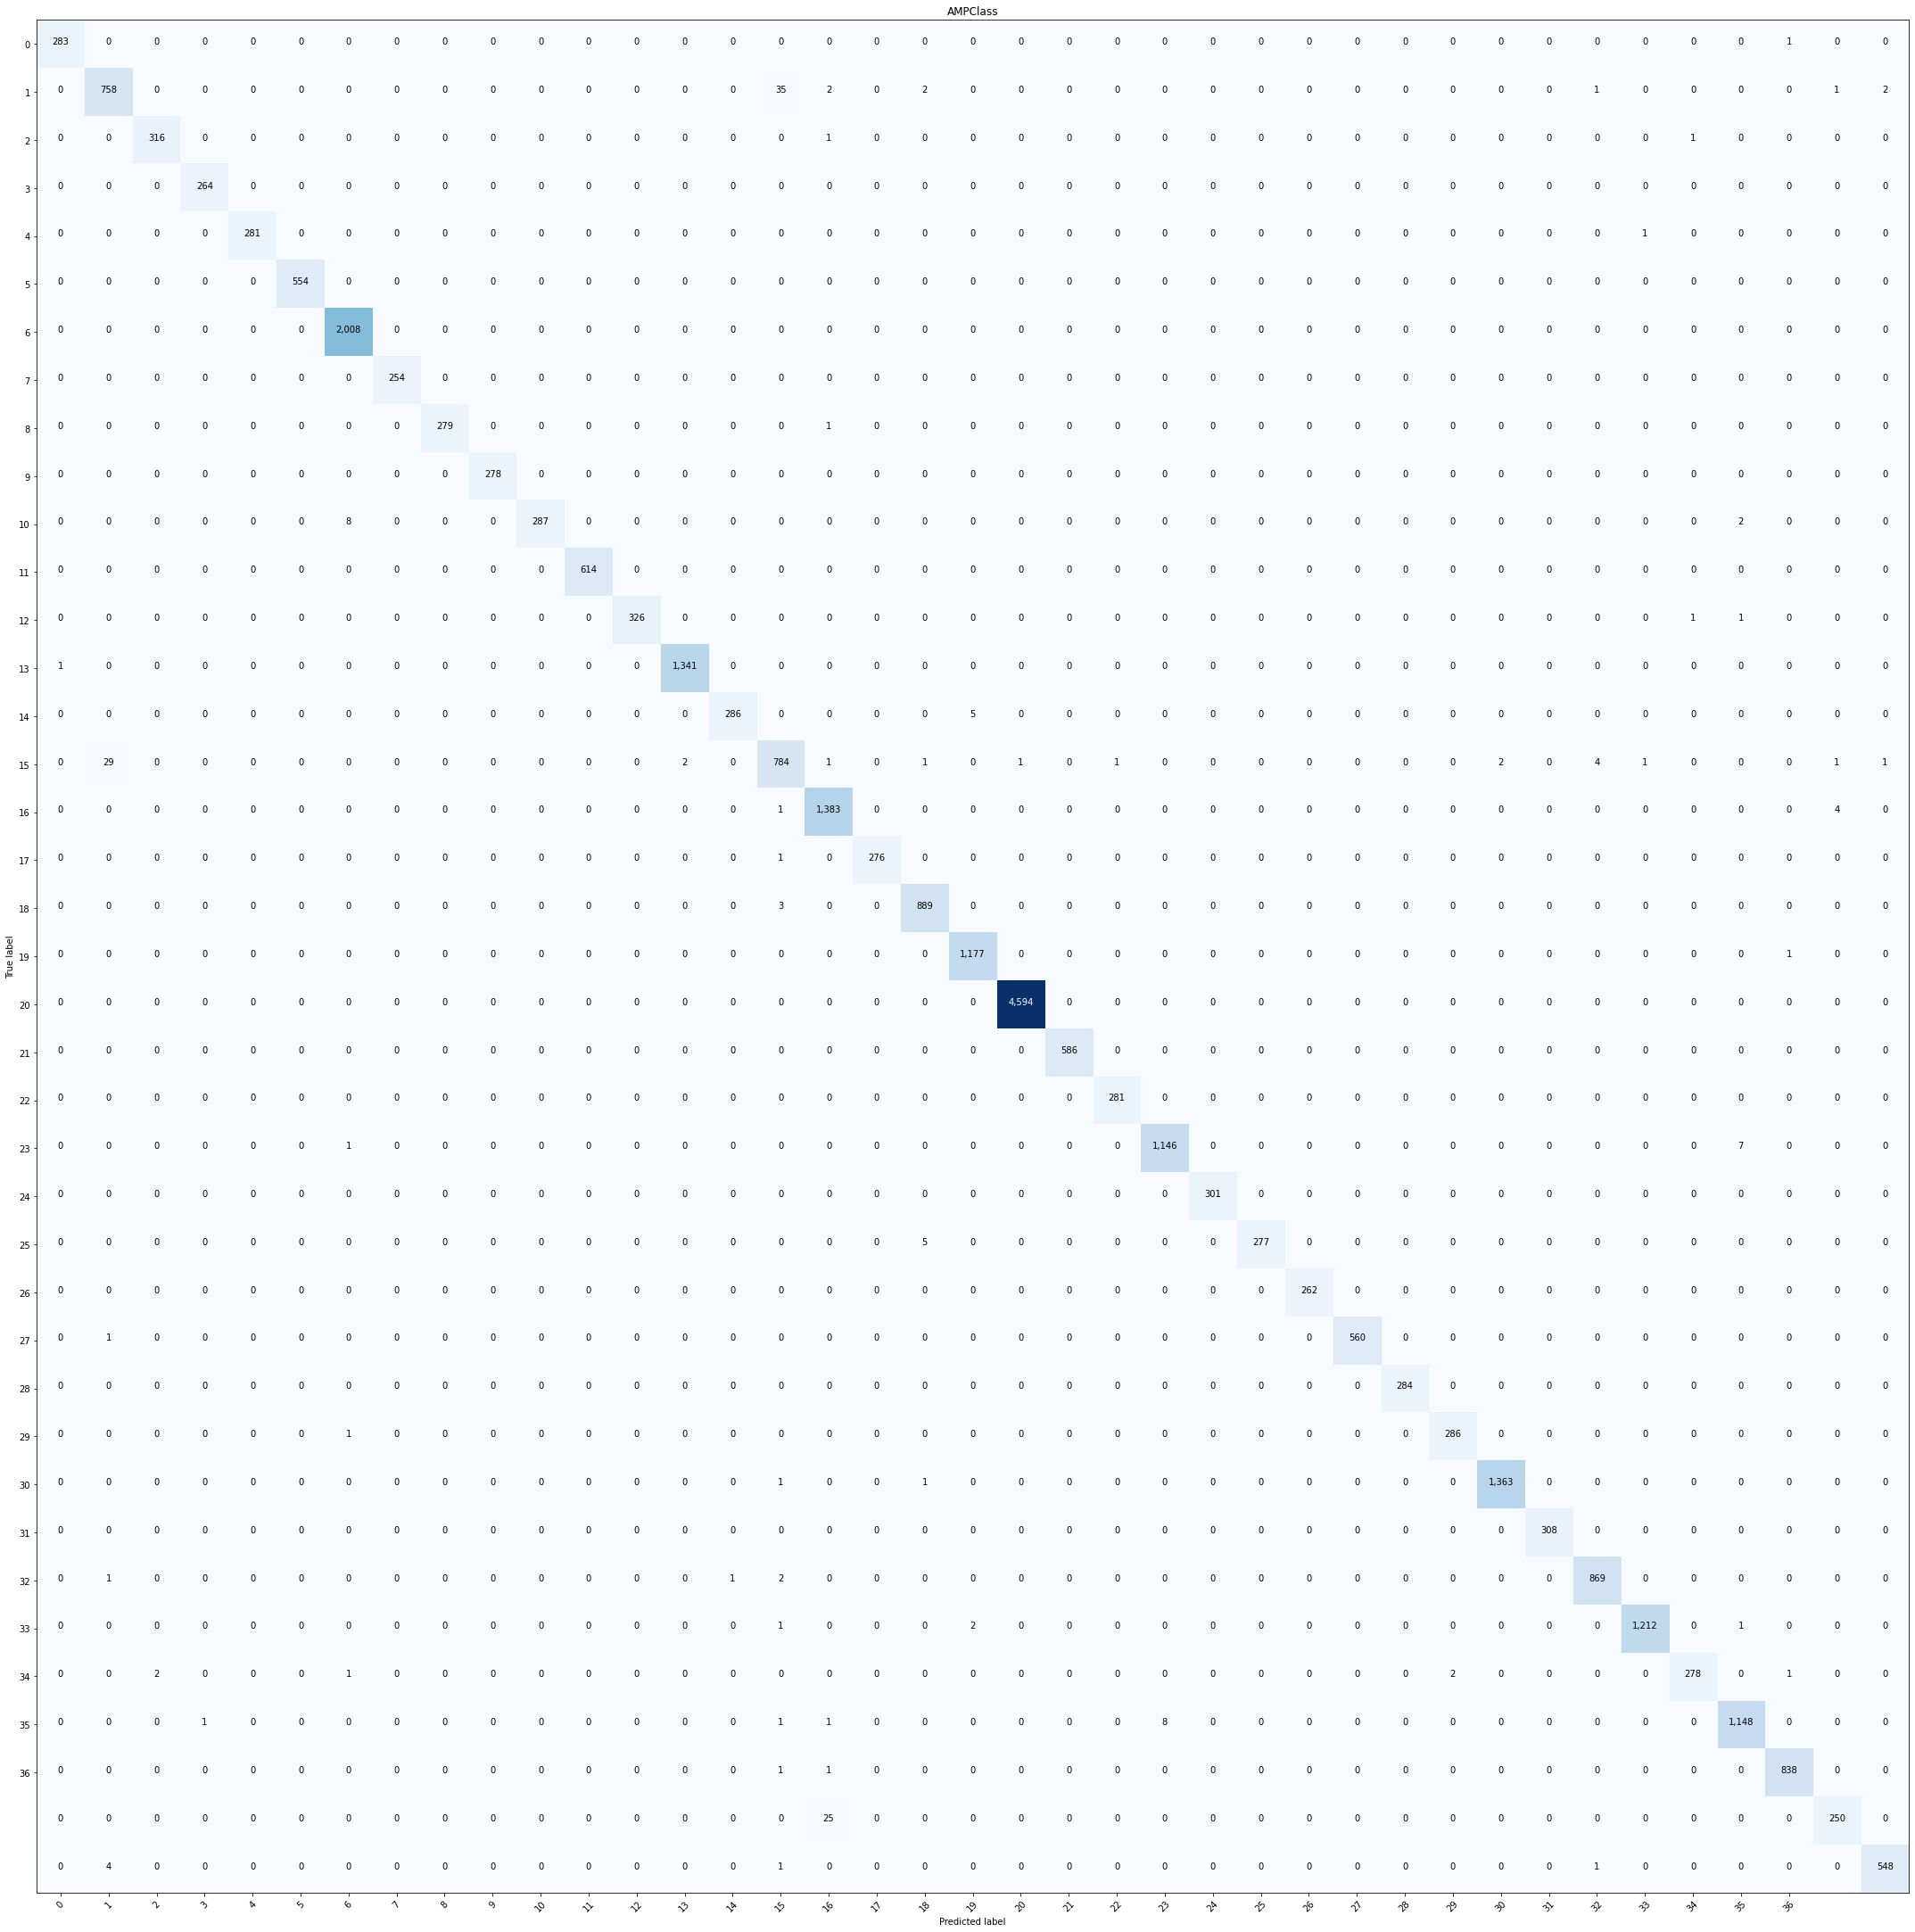

In [18]:
plot_confusion_matrix(cm=sum_cm,
                      normalize    = False,
                      target_names = target_names,
                      title        = "AMPClass")